Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score
import math

In [207]:
#loading data from url
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic=pd.read_csv(url)

In [208]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [209]:
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [210]:
titanic.shape

(891, 12)

In [211]:
#use few columns to check whether passenger is survived or not
col=['Pclass','Sex', 'Age', 'SibSp', 'Parch','Fare']
x=titanic[col]
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833


In [212]:
x.shape

(891, 6)

In [213]:
y=titanic['Survived']

In [214]:
y.shape

(891,)

In [215]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [216]:
#data imputation
mean=x['Age'].mean()
x['Age']=x['Age'].fillna(mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [217]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [218]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [219]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000
887,1,female,19.000000,0,0,30.0000
888,3,female,29.699118,1,2,23.4500
889,1,male,26.000000,0,0,30.0000


In [220]:
x_hot=pd.get_dummies(x,drop_first=True)
x_hot
x=x_hot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


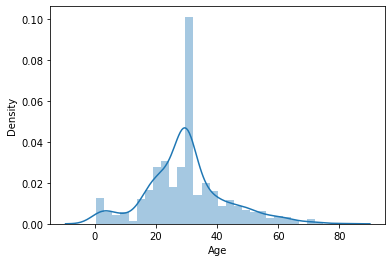

In [221]:
#plotting
sns.distplot(a=x['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


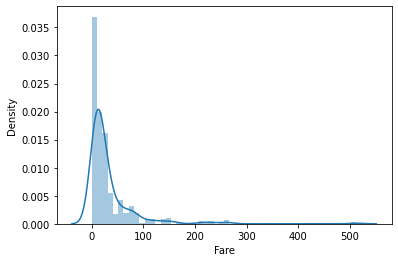

In [222]:
sns.distplot(a=x['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


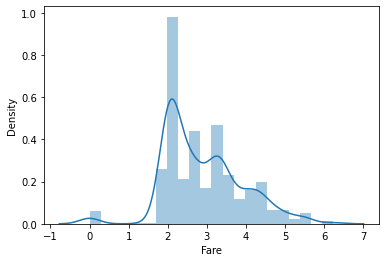

In [223]:
x['Fare']=np.log(x['Fare'],where=x['Fare']!=0)
sns.distplot(a=x['Fare'])

In [224]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.000000,1,0,1.981001,1
1,1,38.000000,1,0,4.266662,0
2,3,26.000000,0,0,2.070022,0
3,1,35.000000,1,0,3.972177,0
4,3,35.000000,0,0,2.085672,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,2.564949,1
887,1,19.000000,0,0,3.401197,0
888,3,29.699118,1,2,3.154870,0
889,1,26.000000,0,0,3.401197,1


In [225]:
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

### Logistic regression

In [226]:
#use of logstic regression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
x_train.shape

(623, 6)

In [228]:
y_pred_log=model_log.predict(x_test)
y_pred_log

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0])

In [229]:
acc_log=accuracy_score(y_test,y_pred_log)
acc_log

0.7873134328358209

### Decision tree

In [230]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier()
model_tree.fit(x_train,y_train)
y_pred_tree=model_tree.predict(x_test)

In [231]:
acc_tree=accuracy_score(y_test,y_pred_tree)
acc_tree

0.7574626865671642